In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [62]:
df = pd.read_csv('./dataset/abalone.data')
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
data = pd.read_csv('./dataset/abalone.data', names=column_names)


In [63]:
# Perform exploratory data analysis
# Display basic statistics of the dataset
print(data.describe())
# df.isnull().any()
print(data.head())

            Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.

In [64]:
# Create a label encoder instance
label_encoder = LabelEncoder()

# Apply label encoding to the "Sex" column
data['Sex'] = label_encoder.fit_transform(data['Sex'])

# Normalize the encoded values to the range [0, 1]
data['Sex'] = data['Sex'] / data['Sex'].max()

# Display the updated DataFrame
print(data.head())

   Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0  1.0   0.455     0.365   0.095        0.5140          0.2245   
1  1.0   0.350     0.265   0.090        0.2255          0.0995   
2  0.0   0.530     0.420   0.135        0.6770          0.2565   
3  1.0   0.440     0.365   0.125        0.5160          0.2155   
4  0.5   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


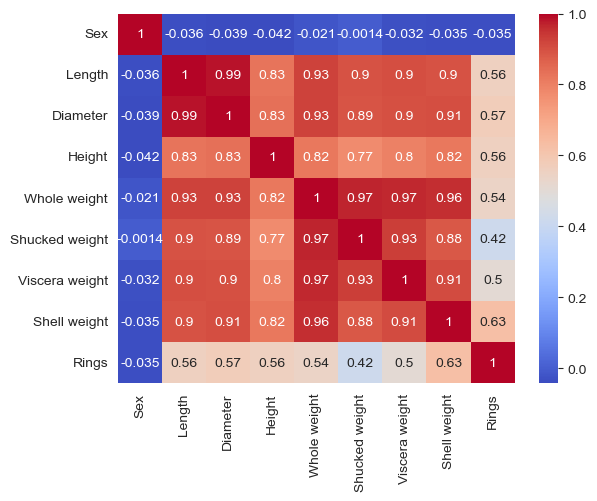

In [73]:
# Visualize the correlation matrix using a heatmap
correlation_matrix = data.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

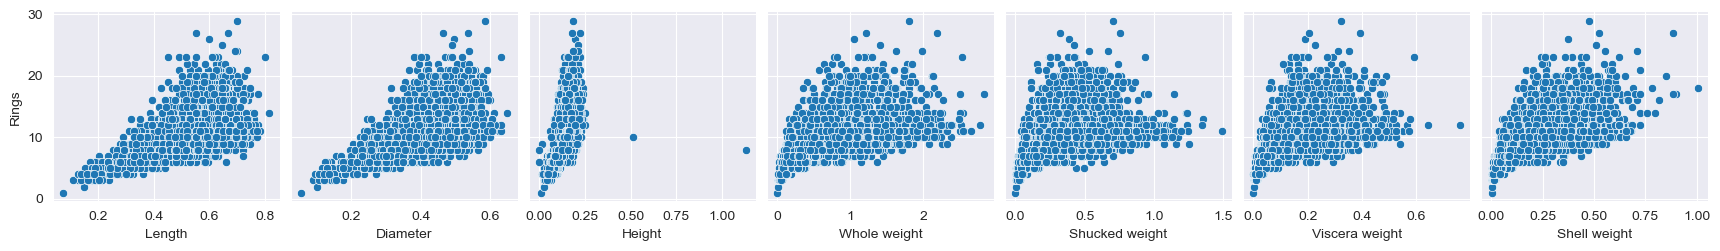

In [66]:
# Plot some scatter plots to visualize relationships
sns.pairplot(data, x_vars=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'], y_vars=['Rings'], kind='scatter')
plt.show()

In [67]:
# Prepare the data for linear regression
X = data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]
y = data['Rings']

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [70]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [71]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 5.055541144299383
R-squared: 0.5329844757724522


In [72]:
# Predict age for a new sample (you can replace the values with your own)
# Create a DataFrame with column names for your new sample
new_sample = pd.DataFrame(data=[[0.5, 0.4, 0.1, 0.6, 0.2, 0.1, 0.2]], columns=['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight'])
predicted_age = model.predict(new_sample)
print(f'Predicted Age for the new sample: {predicted_age[0]} years')

Predicted Age for the new sample: 10.977995042221359 years
